In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# For test train split
from sklearn.model_selection import train_test_split

# For feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For logistic regression
import statsmodels.api as sm

# For RFE(Recursive Feature Elimination)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

# To check the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Important confusion metrics terms for model validation
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus , graphviz


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\amit.soni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# To print all columns in console
pd.set_option('max_columns', None)
pd.set_option('max_rows',None)

In [3]:
# Read Training data 
data = pd.read_csv('datathon_3_train.csv')
data.head()

,ID,AGE,GENDER,DT,WIDTH,HEIGHT,FOLD_POSITION,USER_ID_64,GEO_COUNTRY,GEO_REGION,OPERATING_SYSTEM,BROWSER,LANGUAGE,SELLER_MEMBER_ID,SITE_DOMAIN,PUBLISHER_ID,GEO_DMA,GEO_CITY,APPLICATION_ID,DEVICE_TYPE,POSTAL_CODE,click
0,200001,0,u,2020-09-30T00:02:13.000Z,320,50,0,4543989786418040000,US,CA,176,8,1,74,play.google.com/store/apps/details?id=com.outf...,1673397,803,181749,com.outfit7.mytalkinghank,2,91205,1
1,200002,0,u,2020-09-30T00:02:58.000Z,320,50,1,5455359026978220000,US,TN,228,8,0,74,wtok.com,1564644,659,203748,---,2,37040,1
2,200003,0,u,2020-09-30T00:03:09.000Z,320,50,0,9169035099486450000,US,CA,157,8,1,74,play.google.com/store/apps/details?id=com.mobi...,1673397,803,182529,com.mobilityware.spider,2,91361,1
3,200004,0,u,2020-09-30T00:04:47.000Z,320,50,0,6133507518405250000,US,CA,142,8,1,74,play.google.com/store/apps/details?id=com.mobi...,1673397,803,182154,com.mobilityware.spider,2,91109,1
4,200005,0,u,2020-09-30T00:04:48.000Z,320,50,0,8500881303216180000,US,TX,195,8,1,74,play.google.com/store/apps/details?id=com.outf...,1673397,618,204854,com.outfit7.mytalkinghank,2,77494,1


In [4]:
# Get info and shape of the dataset

print(data.shape)
data.info()

(134858, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134858 entries, 0 to 134857
Data columns (total 22 columns):
ID                  134858 non-null int64
AGE                 134858 non-null int64
GENDER              134858 non-null object
DT                  134858 non-null object
WIDTH               134858 non-null int64
HEIGHT              134858 non-null int64
FOLD_POSITION       134858 non-null int64
USER_ID_64          134858 non-null int64
GEO_COUNTRY         134858 non-null object
GEO_REGION          134841 non-null object
OPERATING_SYSTEM    134858 non-null int64
BROWSER             134858 non-null int64
LANGUAGE            134858 non-null int64
SELLER_MEMBER_ID    134858 non-null int64
SITE_DOMAIN         134858 non-null object
PUBLISHER_ID        134858 non-null int64
GEO_DMA             134858 non-null int64
GEO_CITY            134858 non-null int64
APPLICATION_ID      134858 non-null object
DEVICE_TYPE         134858 non-null int64
POSTAL_CODE         134858 non

In [5]:
# Get summary of numeric columns
data.describe()

,ID,AGE,WIDTH,HEIGHT,FOLD_POSITION,USER_ID_64,OPERATING_SYSTEM,BROWSER,LANGUAGE,SELLER_MEMBER_ID,PUBLISHER_ID,GEO_DMA,GEO_CITY,DEVICE_TYPE,click
count,134858.000000,134858.000000,134858.000000,134858.000000,134858.000000,1.348580e+05,134858.000000,134858.000000,134858.000000,134858.000000,1.348580e+05,134858.000000,134858.000000,134858.000000,134858.000000
mean,268377.051284,0.125777,308.241054,191.697074,0.470443,4.617408e+18,177.746014,9.015149,0.954493,3153.201983,1.173548e+06,880.352208,174841.419486,1.574768,0.316259
std,39666.424212,2.500024,216.859196,179.662471,0.660926,2.662181e+18,61.313752,3.341755,1.724075,3991.068578,6.057617e+05,660.707394,53900.199369,0.640586,0.465017
min,200001.000000,0.000000,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,74.000000,0.000000e+00,1.000000,-1.000000,1.000000,0.000000
25%,233875.250000,0.000000,300.000000,50.000000,0.000000,2.316282e+18,137.000000,8.000000,0.000000,273.000000,7.677260e+05,534.000000,181761.000000,1.000000,0.000000
50%,268387.500000,0.000000,300.000000,250.000000,0.000000,4.621545e+18,170.000000,8.000000,1.000000,1258.000000,1.430148e+06,698.000000,184059.000000,2.000000,0.000000
75%,302753.750000,0.000000,320.000000,250.000000,1.000000,6.912990e+18,228.000000,8.000000,1.000000,6827.000000,1.673397e+06,820.000000,200004.500000,2.000000,1.000000
max,337037.000000,89.000000,1800.000000,1000.000000,2.000000,9.223281e+18,290.000000,43.000000,44.000000,12267.000000,1.867097e+06,2672.000000,555318.000000,7.000000,1.000000


In [6]:
# Split the dataset into test and train
#Perform operations on train set and apply it directly on test set


y = data['click']
x = data.drop('click',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)
train_data = pd.concat([x_train,y_train],axis = 1).reset_index(drop =  True)
test_data = pd.concat([x_test,y_test],axis = 1).reset_index(drop =  True)

(107886, 21)
(107886,)
(26972,)
(26972,)


In [7]:
# Inspect the train set
print(train_data.shape)
train_data.head()

(107886, 22)


,ID,AGE,GENDER,DT,WIDTH,HEIGHT,FOLD_POSITION,USER_ID_64,GEO_COUNTRY,GEO_REGION,OPERATING_SYSTEM,BROWSER,LANGUAGE,SELLER_MEMBER_ID,SITE_DOMAIN,PUBLISHER_ID,GEO_DMA,GEO_CITY,APPLICATION_ID,DEVICE_TYPE,POSTAL_CODE,click
0,283428,0,u,2020-09-30T14:54:42.000Z,300,250,0,464656684678047000,US,ND,137,8,1,11255,accuradio.com,1577917,724,195366,---,1,58102,0
1,270705,0,u,2020-09-30T09:10:03.000Z,160,600,0,7700887734019170000,GB,C9,125,8,1,273,outlook.live.com,1775904,2662,101449,---,1,CA1 1NL,0
2,334197,0,u,2020-09-30T06:43:58.000Z,320,50,0,3667592834463900000,AU,7,228,8,1,357,highlightsfootball.net,1174296,923,218669,---,2,3977,0
3,248061,0,u,2020-09-30T22:30:14.000Z,300,600,0,7171753136239620000,US,MD,137,8,1,459,pch.com,543168,511,190398,---,1,20639,0
4,229033,0,u,2020-09-30T06:41:54.000Z,320,50,0,8211160326471880000,US,MO,195,8,1,74,play.google.com/store/apps/details?id=com.eter...,1673397,616,193226,com.etermax.trivia.preguntados2,2,64131,1


In [8]:
# EDA on Data Starts


# Load Mapping files
browser_mapping = pd.read_csv('browser_mapping.csv')
os_mapping = pd.read_csv('os_mapping.csv')
device_mapping = pd.read_csv('device_mapping.csv')
domain_mapping = pd.read_csv('domain_mapping.csv')
region_mapping = pd.read_csv('region_mapping.csv')

# maintain a list of columns to be dropped
drop_list = []

In [9]:
# Age Column Analysis

#print((train_data['AGE'].value_counts()/len(train_data))*100)

# 99% of the values are unknown, better to drop the column
drop_list.append('AGE')

In [10]:
# Gender
print((train_data['GENDER'].value_counts()/len(train_data))*100)

# 99% values are unknown
drop_list.append('GENDER')

u    99.715440
m     0.175185
f     0.109375
Name: GENDER, dtype: float64


In [11]:
# Timezone(DT) column

def tod_mapping(x):
    if(x in [0,1,2,3,4,5,6,7]):
        return 'Inactive'
    elif(x in [8,9,10,11]):
        return 'Morning'
    elif(x in [12,13,14,15]):
        return 'Afternoon'
    elif(x in [16,17,18,19]):
        return 'Evening'
    else:
        return 'Night'

print(train_data['DT'].apply(lambda x: x.split('T')[0]).unique())
#SInce it is only for one day, lets extract the hours from it and process the data accordingly

train_data['hour'] = train_data['DT'].apply(lambda x: int(x.split('T')[1][:2]))
#print(train_data['hour'].value_counts())

# Lets club the hours into 5 categories, 
#Morning , Afternoon, Evening , Night , Inactive Hours

train_data['time_of_day'] = train_data['hour'].apply(lambda x:tod_mapping(x))
print(train_data['time_of_day'].value_counts())

drop_list.extend(['hour','DT'])

['2020-09-30']
Inactive     25808
Evening      24723
Night        23122
Afternoon    22992
Morning      11241
Name: time_of_day, dtype: int64


In [12]:
print(train_data['FOLD_POSITION'].value_counts()/len(train_data))

0    0.623640
1    0.282845
2    0.093515
Name: FOLD_POSITION, dtype: float64


In [13]:
# Creative size .. WIDTH and Height
# Its always better to consider it as a single variable

def creative_mapping(x):
    if(x in ['250 x 300','1 x 1','50 x 320','90 x 728','600 x 160']):
        return x 
    else:
        return 'others' 

train_data['creative_size'] =  train_data['HEIGHT'].map(str) + ' x ' + train_data['WIDTH'].map(str) 
train_data['creative_size'] = train_data['creative_size'].apply(lambda x:creative_mapping(x))
print(train_data['creative_size'].value_counts()/len(train_data))

drop_list.extend(['HEIGHT','WIDTH'])

250 x 300    0.385500
1 x 1        0.166027
50 x 320     0.152170
90 x 728     0.137849
others       0.083106
600 x 160    0.075348
Name: creative_size, dtype: float64


In [14]:
# Geo Country

def country_mapping(x):
    if(x in ['US','GB','CA']):
        return x
    else:
        return 'others'

#print(train_data['GEO_COUNTRY'].value_counts())

# Since there are a lot of countries, lets group the countries with very low numbers as 'others'

train_data['country'] = train_data['GEO_COUNTRY'].apply(lambda x : country_mapping(x))
print(train_data['country'] .value_counts()/len(train_data))
drop_list.append('GEO_COUNTRY')

US        0.768923
GB        0.107641
others    0.063419
CA        0.060017
Name: country, dtype: float64


In [15]:
# Geo region
#print(train_data['GEO_REGION'].value_counts()/len(train_data))

train_data = pd.merge(train_data,region_mapping, how = 'left',on = 'GEO_REGION')
print(train_data['geo_region'].value_counts()/len(train_data))

drop_list.append('GEO_REGION')

high_volume         0.364774
very_high_volume    0.312543
medium_volume       0.235137
low_volume          0.087250
Name: geo_region, dtype: float64


In [16]:
# Operating system
#print(train_data['OPERATING_SYSTEM'].value_counts())

train_data = pd.merge(train_data,os_mapping, how = 'left',on = 'OPERATING_SYSTEM')
print(train_data['operating_system'].value_counts()/len(train_data))
drop_list.append('OPERATING_SYSTEM')

Android    0.418581
Windows    0.411073
iOS        0.099207
Others     0.040218
Unknown    0.030922
Name: operating_system, dtype: float64


In [17]:
# Browser
#print(train_data['BROWSER'].value_counts())

train_data = pd.merge(train_data,browser_mapping, how = 'left',on = 'BROWSER')
print(train_data['browser'].value_counts()/len(train_data))
drop_list.append('BROWSER')

Chrome             0.778368
Safari             0.118727
Edge               0.037920
Others             0.033545
Samsung Browser    0.024285
Unknown            0.007156
Name: browser, dtype: float64


In [18]:
# Device
#print(train_data['DEVICE_TYPE'].value_counts())

train_data = pd.merge(train_data,device_mapping, how = 'left',on = 'DEVICE_TYPE')
print(train_data['device_type'].value_counts()/len(train_data))

drop_list.append("DEVICE_TYPE")

Other     0.483890
PC        0.474427
Tablet    0.041683
Name: device_type, dtype: float64


In [19]:
# language

def language_mapping(x):
    if(x in [1,0]):
        return x
    else:
        return 'others'

#print(train_data['LANGUAGE'].value_counts()/len(train_data))

train_data['language'] = train_data['LANGUAGE'].apply(language_mapping)
print(train_data['language'].value_counts()/len(train_data))

drop_list.append('LANGUAGE')

1         0.688727
0         0.271796
others    0.039477
Name: language, dtype: float64


In [20]:
# SITE_DOMAIN

#print(train_data['SITE_DOMAIN'].value_counts()/len(train_data))

# Lets split the sitedomains so that they only contain domains and not urls
train_data['SITE_DOMAIN'] = train_data['SITE_DOMAIN'].apply(lambda x :x.split('/')[0])

train_data = pd.merge(train_data,domain_mapping, how = 'left',on = 'SITE_DOMAIN')
print(train_data['site_domain'].value_counts()/len(train_data))

drop_list.append('SITE_DOMAIN')

very_high_volume    0.348182
high_volume         0.317196
medium_volume       0.231309
low_volume          0.096741
Name: site_domain, dtype: float64


In [21]:
# APPLICATION_ID

#print(train_data['APPLICATION_ID'].value_counts()/len(train_data))
# Lets break this column as app/web

train_data['APPLICATION_ID'] = train_data['APPLICATION_ID'].apply(lambda x : 'app' if x == '---' else 'web')
print(train_data['APPLICATION_ID'].value_counts()/len(train_data))

app    0.861242
web    0.138758
Name: APPLICATION_ID, dtype: float64


In [22]:
# We will keep these columns in the final data .. lets remove other columns like id, user_id_64, dma, postal_code, seller and member id
drop_list.extend(['ID','USER_ID_64','SELLER_MEMBER_ID','PUBLISHER_ID','GEO_DMA','POSTAL_CODE','GEO_CITY'])

# final train dataframe after dropping redundent columns
train_data_v2 = train_data.drop(drop_list,axis = 1)


In [23]:
print(train_data_v2.shape)
train_data_v2.head()


(107886, 12)


,FOLD_POSITION,APPLICATION_ID,click,time_of_day,creative_size,country,geo_region,operating_system,browser,device_type,language,site_domain
0,0,app,0,Afternoon,250 x 300,US,medium_volume,Windows,Chrome,Other,1,medium_volume
1,0,app,0,Morning,600 x 160,GB,low_volume,Windows,Chrome,Other,1,very_high_volume
2,0,app,0,Inactive,50 x 320,others,medium_volume,Android,Chrome,PC,1,low_volume
3,0,app,0,Night,others,US,high_volume,Windows,Chrome,Other,1,very_high_volume
4,0,web,1,Inactive,50 x 320,US,high_volume,Android,Chrome,PC,1,very_high_volume


In [24]:
# Weight of Evidence analysis to check the significance of each column

def woe_cal(df,feature,target):
    df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: dfx['woe']*
                                           (dfx[1]-dfx[0])))
    return df_woe_iv


'''
<0.02              useless for prediction
0.02 to 0.1        week predictor
0.1 to 0.3         medium predictor 
0.3 - 0.5          strong predictor
>0.5               suspisious or too good to be true
'''

woe_columns_to_drop = []

In [25]:
# WOE for different variables

col_list = train_data_v2.columns.drop('click')
for col in col_list:
    res_df = woe_cal(train_data_v2,col,'click')
    print(res_df)
    print(col," ",round(res_df[np.isfinite(res_df['iv'])]['iv'].sum(),2))

click                 0         1       woe        iv
FOLD_POSITION                                        
0              0.565796  0.748776  0.280206  0.051272
1              0.318754  0.205161 -0.440627  0.050052
2              0.115450  0.046064 -0.918812  0.063753
FOLD_POSITION   0.17
click                  0         1       woe        iv
APPLICATION_ID                                        
app             0.942655  0.685119 -0.319107  0.082181
web             0.057345  0.314881  1.703101  0.438608
APPLICATION_ID   0.52
click               0         1       woe        iv
time_of_day                                        
Afternoon    0.217441  0.203753 -0.065018  0.000890
Evening      0.241214  0.203079 -0.172090  0.006563
Inactive     0.209675  0.303123  0.368581  0.034443
Morning      0.105434  0.101510 -0.037924  0.000149
Night        0.226237  0.188535 -0.182298  0.006873
time_of_day   0.05
click                 0         1       woe        iv
creative_size                 

In [26]:
# Based on the WOE value, lets remove the geo_region column

train_data_v2 = train_data_v2.drop(['geo_region'],axis = 1)

In [27]:
# Converting into dummy variables for categorical varibales with more than 2 unique values
dummy_list = ['FOLD_POSITION','APPLICATION_ID','time_of_day','creative_size','country','operating_system','browser','device_type','language','site_domain']

dummy_var = pd.get_dummies(train_data_v2[dummy_list], drop_first = True)

# Adding to dataframe
train_data_v3 = pd.concat([train_data_v2, dummy_var], axis=1)
train_data_v3.drop(dummy_list, axis = 1, inplace =  True)

In [28]:
print(train_data_v3.shape)
train_data_v3.head()

(107886, 30)


,click,APPLICATION_ID_web,time_of_day_Evening,time_of_day_Inactive,time_of_day_Morning,time_of_day_Night,creative_size_250 x 300,creative_size_50 x 320,creative_size_600 x 160,creative_size_90 x 728,creative_size_others,country_GB,country_US,country_others,operating_system_Others,operating_system_Unknown,operating_system_Windows,operating_system_iOS,browser_Edge,browser_Others,browser_Safari,browser_Samsung Browser,browser_Unknown,device_type_PC,device_type_Tablet,language_1,language_others,site_domain_low_volume,site_domain_medium_volume,site_domain_very_high_volume
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [29]:
# Apply recursive feature elimination to select features

# Feature Selection Using RFE(Top 20)
Y_Train = train_data_v3[['click']]
X_Train = train_data_v3.drop('click',axis = 1)

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_Train, Y_Train)

In [30]:
# Print RFE Results
list(zip(X_Train.columns, rfe.support_, rfe.ranking_))
# Print the top features selected by RFE
col = X_Train.columns[rfe.support_]
col

Index(['APPLICATION_ID_web', 'creative_size_250 x 300',
       'creative_size_50 x 320', 'creative_size_600 x 160',
       'creative_size_90 x 728', 'creative_size_others', 'country_GB',
       'operating_system_Others', 'operating_system_Unknown',
       'operating_system_Windows', 'operating_system_iOS', 'browser_Edge',
       'browser_Safari', 'browser_Unknown', 'device_type_PC',
       'device_type_Tablet', 'language_1', 'language_others',
       'site_domain_low_volume', 'site_domain_very_high_volume'],
      dtype='object')

In [31]:
# Model 1 
X_Train_sm = sm.add_constant(X_Train[col])
log_model = sm.GLM(Y_Train,X_Train_sm, family = sm.families.Binomial())
res = log_model.fit()
print(res.summary())


# Calculating VIF
vif = pd.DataFrame()
X = X_Train_sm[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  click   No. Observations:               107886
Model:                            GLM   Df Residuals:                   107865
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51441.
Date:                Tue, 10 Nov 2020   Deviance:                   1.0288e+05
Time:                        12:13:54   Pearson chi2:                 1.11e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [32]:
# Inspect Shape and columns
print(X_Train_sm.shape)
print(X_Train_sm.columns)

Y_Train.shape

(107886, 21)
Index(['const', 'APPLICATION_ID_web', 'creative_size_250 x 300',
       'creative_size_50 x 320', 'creative_size_600 x 160',
       'creative_size_90 x 728', 'creative_size_others', 'country_GB',
       'operating_system_Others', 'operating_system_Unknown',
       'operating_system_Windows', 'operating_system_iOS', 'browser_Edge',
       'browser_Safari', 'browser_Unknown', 'device_type_PC',
       'device_type_Tablet', 'language_1', 'language_others',
       'site_domain_low_volume', 'site_domain_very_high_volume'],
      dtype='object')


(107886, 1)

In [33]:
# Making Predictions on Y Variables
Y_Train_pred = pd.DataFrame(res.predict(X_Train_sm)).reset_index(drop = True)
Y_Train_pred.columns = ['Predicted']
# Lets set cutoff to be 0.5 now
cutoff  = 0.5
Y_Train = Y_Train.reset_index(drop = True)
Y_Train['Predicted'] = Y_Train_pred['Predicted']


Y_Train['Predicted_Label'] = Y_Train['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)
print(Y_Train.shape)

(107886, 3)


In [34]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Train.click, Y_Train.Predicted_Label )
print(confusion_matrix)
print(Y_Train.shape)

# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Train.click, Y_Train.Predicted_Label))
# Checking the sensitivity of the model
print("recall: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating Precision
print("precision: ",TP/float(TP + TN))


recall = TN / float(TN+FP)
precision = TP/float(TP + TN)

f_score = 2*(recall * precision) / (recall + precision)
print('f-score ', f_score)


[[65812  7969]
 [15675 18430]]
(107886, 3)
Accuracy:  0.7808427414122314
recall:  0.5403899721448467
Specificity:  0.8919911630365541
precision:  0.21877448303696492
f-score  0.35137007748967963


In [35]:
# Adjust Cutoff

# Creating columns with different probability cutoffs 
Y_Train_v2 = Y_Train.copy()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_Train_v2[i]= Y_Train_v2.Predicted.map(lambda x: 1 if x > i else 0)

# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_Train_v2.click, Y_Train_v2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[1,1] + cm1[0,1]) 
    recall = cm1[1,1]/(cm1[1,1] + cm1[1,0]) 
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision,recall]
print(cutoff_df)

     prob  accuracy     sensi     speci  precision    recall
0.0   0.0  0.316121  1.000000  0.000000   0.316121  1.000000
0.1   0.1  0.567479  0.927283  0.401160   0.417172  0.927283
0.2   0.2  0.671561  0.861663  0.583687   0.488944  0.861663
0.3   0.3  0.724709  0.767424  0.704965   0.545942  0.767424
0.4   0.4  0.768849  0.649025  0.824237   0.630573  0.649025
0.5   0.5  0.780843  0.540390  0.891991   0.698133  0.540390
0.6   0.6  0.772093  0.402873  0.942763   0.764906  0.402873
0.7   0.7  0.761572  0.316610  0.967254   0.817164  0.316610
0.8   0.8  0.730428  0.163143  0.992654   0.911235  0.163143
0.9   0.9  0.686030  0.008269  0.999322   0.849398  0.008269


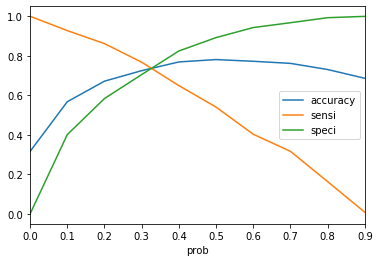

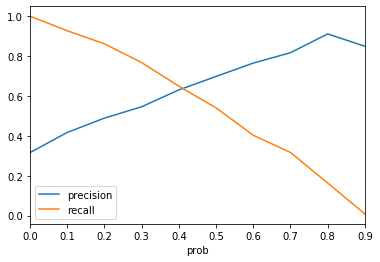

In [36]:
# Plots to decide optimum cutoff

# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# Plotting precision and recall for various probabilities.
cutoff_df.plot.line(x='prob', y=['precision','recall'])
plt.show()

# Lets Keep the cutoff to be 0.25 and repeat the same analysis

In [37]:
# Lets keep the cutoff around 0.25

# Making Predictions on Y Variables
Y_Train_pred = pd.DataFrame(res.predict(X_Train_sm)).reset_index(drop = True)
Y_Train_pred.columns = ['Predicted']

cutoff  = 0.52
Y_Train = Y_Train.reset_index(drop = True)
Y_Train['Predicted'] = Y_Train_pred['Predicted']


Y_Train['Predicted_Label'] = Y_Train['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)
print(Y_Train.shape)

(107886, 3)


In [38]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Train.click, Y_Train.Predicted_Label )
print(confusion_matrix)
print(Y_Train.shape)

# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Train.click, Y_Train.Predicted_Label))
# Checking the sensitivity of the model
print("recall: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating Precision
print("precision: ",TP/float(TP + FP))


recall = TP / float(TP+FN)
precision = TP/float(TP + FP)

f_score = 2*(recall * precision) / (recall + precision)
print('f-score ', f_score)

[[66502  7279]
 [16608 17497]]
(107886, 3)
Accuracy:  0.7785903639026379
recall:  0.5130332795777746
Specificity:  0.9013431642292731
precision:  0.7062076202776881
f-score  0.5943173519471477


In [40]:
# Working with test data now

# Timezone(DT) column
test_data['hour'] = test_data['DT'].apply(lambda x: int(x.split('T')[1][:2]))
test_data['time_of_day'] = test_data['hour'].apply(lambda x:tod_mapping(x))


# Creative size .. WIDTH and Height
test_data['creative_size'] =  test_data['HEIGHT'].map(str) + ' x ' + test_data['WIDTH'].map(str) 
test_data['creative_size'] = test_data['creative_size'].apply(lambda x:creative_mapping(x))


# Geo Country
test_data['country'] = test_data['GEO_COUNTRY'].apply(lambda x : country_mapping(x))

# Operating system
test_data = pd.merge(test_data,os_mapping, how = 'left',on = 'OPERATING_SYSTEM')

# Browser
test_data = pd.merge(test_data,browser_mapping, how = 'left',on = 'BROWSER')

# Device
test_data = pd.merge(test_data,device_mapping, how = 'left',on = 'DEVICE_TYPE')


# language
test_data['language'] = test_data['LANGUAGE'].apply(language_mapping)

# SITE_DOMAIN
test_data['SITE_DOMAIN'] = test_data['SITE_DOMAIN'].apply(lambda x :x.split('/')[0])
test_data = pd.merge(test_data,domain_mapping, how = 'left',on = 'SITE_DOMAIN')


# APPLICATION_ID
test_data['APPLICATION_ID'] = test_data['APPLICATION_ID'].apply(lambda x : 'app' if x == '---' else 'web')

test_data_v2 = test_data.drop(drop_list,axis = 1)

In [41]:
test_data_v2.columns

Index(['FOLD_POSITION', 'APPLICATION_ID', 'click', 'time_of_day',
       'creative_size', 'country', 'operating_system', 'browser',
       'device_type', 'language', 'site_domain'],
      dtype='object')

In [42]:
# Converting into dummy variables for categorical varibales with more than 2 unique values
dummy_list = ['FOLD_POSITION','APPLICATION_ID','time_of_day','creative_size','country','operating_system','browser','device_type','language','site_domain']

dummy_var = pd.get_dummies(test_data_v2[dummy_list], drop_first = True)

# Adding to dataframe
test_data_v3 = pd.concat([test_data_v2, dummy_var], axis=1)
test_data_v3.drop(dummy_list, axis = 1, inplace =  True)

In [43]:
# Preparing Final Column list for test set
final_col_list =  ['APPLICATION_ID_web', 'creative_size_250 x 300',
       'creative_size_50 x 320', 'creative_size_600 x 160',
       'creative_size_90 x 728', 'creative_size_others', 'country_GB',
       'operating_system_Others', 'operating_system_Unknown',
       'operating_system_Windows', 'operating_system_iOS', 'browser_Edge',
       'browser_Safari', 'browser_Unknown', 'device_type_PC',
       'device_type_Tablet', 'language_1', 'language_others',
       'site_domain_low_volume', 'site_domain_very_high_volume']
X_Test = test_data_v3[final_col_list]
Y_Test = test_data_v3['click']

In [44]:
# Making Predictions on Y Variables
X_Test_sm = sm.add_constant(X_Test)
Y_Test_pred = pd.DataFrame(res.predict(X_Test_sm)).reset_index(drop = True)
Y_Test_pred.columns = ['Predicted']
Y_Test_pred['Predicted_Label'] = Y_Test_pred['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)

Y_Test_pred['Actual_Label'] = Y_Test
Y_Test_pred.head()

,Predicted,Predicted_Label,Actual_Label
0,0.689658,1,1
1,0.103835,0,0
2,0.819832,1,1
3,0.392590,1,0
4,0.215411,0,1


In [45]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_Test_pred.Actual_Label, Y_Test_pred.Predicted_Label )
print(confusion_matrix)

# Checking other metrics
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(Y_Test_pred.Actual_Label, Y_Test_pred.Predicted_Label))
print("recall: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating Precision
print("precision: ",TP/float(TP + FP))


recall = TP / float(TP+FN)
precision = TP/float(TP + FP)

f_score = 2*(recall * precision) / (recall + precision)
print('f-score ', f_score)

[[15115  3312]
 [ 2912  5633]]
Accuracy:  0.7692421770725196
recall:  0.659215915740199
Specificity:  0.8202637434199815
precision:  0.6297372833985466
f-score  0.6441395082904516


In [46]:

# Loading the actual test data

test_data = pd.read_csv('datathon_3_test.csv')
print(test_data.shape)
test_data.head()



(15988, 21)


,ID,AGE,GENDER,DT,WIDTH,HEIGHT,FOLD_POSITION,USER_ID_64,GEO_COUNTRY,GEO_REGION,OPERATING_SYSTEM,BROWSER,LANGUAGE,SELLER_MEMBER_ID,SITE_DOMAIN,PUBLISHER_ID,GEO_DMA,GEO_CITY,APPLICATION_ID,DEVICE_TYPE,POSTAL_CODE
0,20001,0,u,2020-10-02T22:26:16.000Z,728,90,0,8967919179003320000,US,CA,137,8,0,1226,wired.com,1438767,855,181382,---,1,93420
1,20002,0,u,2020-10-02T17:31:21.000Z,1,1,0,6971483750980190000,US,LA,279,9,0,2480,heywise.com,1834122,622,189505,---,2,70003
2,20003,0,u,2020-10-02T00:21:37.000Z,320,50,0,8168457354117550000,US,FL,195,8,0,3552,cnet.com,0,548,183718,---,2,34986
3,20004,0,u,2020-10-02T03:35:03.000Z,320,50,0,2364726482831150000,US,MA,228,8,0,3552,cnet.com,0,506,190013,---,2,1960
4,20005,0,u,2020-10-02T21:33:31.000Z,728,90,1,8550489248743440000,US,TX,137,7,0,273,yahoo.com,951279,618,204799,---,1,77024


In [47]:
# Working with test data now

# Timezone(DT) column
test_data['hour'] = test_data['DT'].apply(lambda x: int(x.split('T')[1][:2]))
test_data['time_of_day'] = test_data['hour'].apply(lambda x:tod_mapping(x))


# Creative size .. WIDTH and Height
test_data['creative_size'] =  test_data['HEIGHT'].map(str) + ' x ' + test_data['WIDTH'].map(str) 
test_data['creative_size'] = test_data['creative_size'].apply(lambda x:creative_mapping(x))


# Geo Country
test_data['country'] = test_data['GEO_COUNTRY'].apply(lambda x : country_mapping(x))

# Operating system
test_data = pd.merge(test_data,os_mapping, how = 'left',on = 'OPERATING_SYSTEM')

# Browser
test_data = pd.merge(test_data,browser_mapping, how = 'left',on = 'BROWSER')

# Device
test_data = pd.merge(test_data,device_mapping, how = 'left',on = 'DEVICE_TYPE')


# language
test_data['language'] = test_data['LANGUAGE'].apply(language_mapping)

# SITE_DOMAIN
test_data['SITE_DOMAIN'] = test_data['SITE_DOMAIN'].apply(lambda x :x.split('/')[0])
test_data = pd.merge(test_data,domain_mapping, how = 'left',on = 'SITE_DOMAIN')


# APPLICATION_ID
test_data['APPLICATION_ID'] = test_data['APPLICATION_ID'].apply(lambda x : 'app' if x == '---' else 'web')

test_data_v2 = test_data.drop(drop_list,axis = 1)

In [48]:
# Converting into dummy variables for categorical varibales with more than 2 unique values
dummy_list = ['FOLD_POSITION','APPLICATION_ID','time_of_day','creative_size','country','operating_system','browser','device_type','language','site_domain']

dummy_var = pd.get_dummies(test_data_v2[dummy_list], drop_first = True)

# Adding to dataframe
test_data_v3 = pd.concat([test_data_v2, dummy_var], axis=1)
test_data_v3.drop(dummy_list, axis = 1, inplace =  True)

In [49]:
final_col_list =  ['APPLICATION_ID_web', 'creative_size_250 x 300',
       'creative_size_50 x 320', 'creative_size_600 x 160',
       'creative_size_90 x 728', 'creative_size_others', 'country_GB',
       'operating_system_Others', 'operating_system_Unknown',
       'operating_system_Windows', 'operating_system_iOS', 'browser_Edge',
       'browser_Safari', 'browser_Unknown', 'device_type_PC',
       'device_type_Tablet', 'language_1', 'language_others',
       'site_domain_low_volume', 'site_domain_very_high_volume']
X_Test = test_data_v3[final_col_list]

In [50]:
# Making Predictions on Y Variables
X_Test_sm = sm.add_constant(X_Test)
Y_Test_pred = pd.DataFrame(res.predict(X_Test_sm)).reset_index(drop = True)
Y_Test_pred.columns = ['Predicted']
Y_Test_pred['Predicted_Label'] = Y_Test_pred['Predicted'].apply(lambda x : 1 if x>=cutoff else 0)

In [51]:
Y_Test_pred.to_csv('final_result4.csv')